In [1]:
%load_ext autoreload
%autoreload 2

# Model: Pixel Wise Metric Learning

I0329 14:59:48.426030 140736097145664 logging.py:26] Loaded dataset data
I0329 14:59:48.426663 140736097145664 logging.py:26] Extracted sequences for each subset
I0329 14:59:48.437802 140736097145664 fabric.py:10] Created connector to localhost service
I0329 14:59:48.440469 140736097145664 logging.py:26] Loaded dataset data
I0329 14:59:48.441751 140736097145664 logging.py:26] Extracted sequences for each subset
I0329 14:59:48.442770 140736097145664 logging.py:26] Checking DAVIS dataset files
I0329 14:59:48.472276 140736097145664 service.py:60] Starting evaluation session
I0329 14:59:48.473104 140736097145664 session.py:55] Started session with 90 samples
I0329 14:59:48.473977 140736097145664 session.py:109] Start evaluation for sequence bike-packing
I0329 14:59:48.529462 140736097145664 logging.py:26] Loaded scribble for sequence bike-packing and scribble_idx 1
I0329 14:59:48.530241 140736097145664 logging.py:26] /Users/alberto/Workspace/CVL/datasets/davis-2017/data/DAVIS/Scribbles/bik

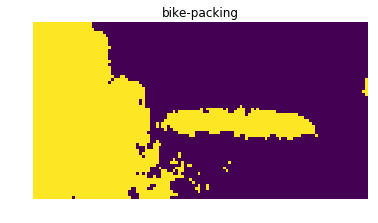

I0329 14:59:50.658780 140736097145664 session.py:147] The model took 2.128 seconds to make a prediction
I0329 14:59:50.996463 140736097145664 logging.py:26] Loaded annotations for sequence bike-packing
I0329 14:59:50.997438 140736097145664 logging.py:26] at path: /Users/alberto/Workspace/CVL/datasets/davis-2017/data/DAVIS/Annotations/480p/bike-packing
I0329 14:59:50.997967 140736097145664 logging.py:26] Annotations shape: (69, 480, 910)
I0329 14:59:52.095196 140736097145664 logging.py:26] For sequence bike-packing the worst frames is #57 with Jaccard: 0.050
I0329 14:59:53.018187 140736097145664 logging.py:26] Creating scribbles from error mask at object_id=0
I0329 14:59:53.021970 140736097145664 logging.py:26] Erosion and dilation with kernel radius: 16.0
I0329 14:59:53.571723 140736097145664 logging.py:26] Time to compute the skeleton mask: 552.724 ms
I0329 14:59:53.645485 140736097145664 logging.py:26] Time to transform the skeleton mask into a graph: 73.778 ms
I0329 14:59:53.933322 

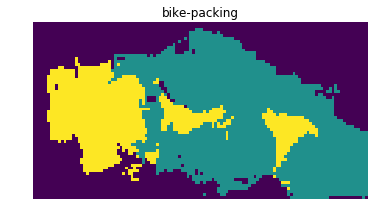

I0329 14:59:58.327255 140736097145664 session.py:147] The model took 3.142 seconds to make a prediction
I0329 14:59:58.723128 140736097145664 logging.py:26] Loaded annotations for sequence bike-packing
I0329 14:59:58.724010 140736097145664 logging.py:26] at path: /Users/alberto/Workspace/CVL/datasets/davis-2017/data/DAVIS/Annotations/480p/bike-packing
I0329 14:59:58.724869 140736097145664 logging.py:26] Annotations shape: (69, 480, 910)
I0329 14:59:59.873189 140736097145664 logging.py:26] For sequence bike-packing the worst frames is #16 with Jaccard: 0.015
I0329 15:00:00.785499 140736097145664 logging.py:26] Creating scribbles from error mask at object_id=0
I0329 15:00:00.789290 140736097145664 logging.py:26] Erosion and dilation with kernel radius: 16.0
I0329 15:00:01.267954 140736097145664 logging.py:26] Time to compute the skeleton mask: 481.604 ms
I0329 15:00:01.298964 140736097145664 logging.py:26] Time to transform the skeleton mask into a graph: 31.015 ms
I0329 15:00:01.371104 

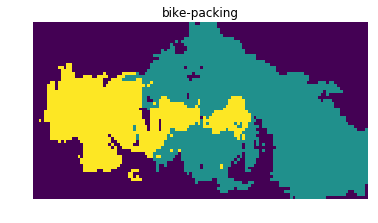

I0329 15:00:05.756236 140736097145664 session.py:147] The model took 3.202 seconds to make a prediction
I0329 15:00:06.183933 140736097145664 logging.py:26] Loaded annotations for sequence bike-packing
I0329 15:00:06.184722 140736097145664 logging.py:26] at path: /Users/alberto/Workspace/CVL/datasets/davis-2017/data/DAVIS/Annotations/480p/bike-packing
I0329 15:00:06.185728 140736097145664 logging.py:26] Annotations shape: (69, 480, 910)
I0329 15:00:07.317016 140736097145664 logging.py:26] For sequence bike-packing the worst frames is #17 with Jaccard: 0.040
I0329 15:00:08.267891 140736097145664 logging.py:26] Creating scribbles from error mask at object_id=0
I0329 15:00:08.271517 140736097145664 logging.py:26] Erosion and dilation with kernel radius: 16.0
I0329 15:00:08.849657 140736097145664 logging.py:26] Time to compute the skeleton mask: 580.933 ms
I0329 15:00:08.944777 140736097145664 logging.py:26] Time to transform the skeleton mask into a graph: 95.131 ms
I0329 15:00:09.029238 

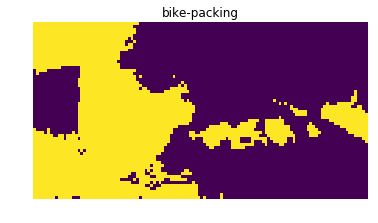

I0329 15:00:13.734960 140736097145664 session.py:147] The model took 3.594 seconds to make a prediction
I0329 15:00:14.115204 140736097145664 logging.py:26] Loaded annotations for sequence bike-packing
I0329 15:00:14.116055 140736097145664 logging.py:26] at path: /Users/alberto/Workspace/CVL/datasets/davis-2017/data/DAVIS/Annotations/480p/bike-packing
I0329 15:00:14.116887 140736097145664 logging.py:26] Annotations shape: (69, 480, 910)
I0329 15:00:15.334611 140736097145664 logging.py:26] For sequence bike-packing the worst frames is #14 with Jaccard: 0.045
I0329 15:00:16.355350 140736097145664 logging.py:26] Creating scribbles from error mask at object_id=0
I0329 15:00:16.359190 140736097145664 logging.py:26] Erosion and dilation with kernel radius: 16.0
I0329 15:00:17.019898 140736097145664 logging.py:26] Time to compute the skeleton mask: 663.615 ms
I0329 15:00:17.109129 140736097145664 logging.py:26] Time to transform the skeleton mask into a graph: 89.250 ms
I0329 15:00:17.551053 

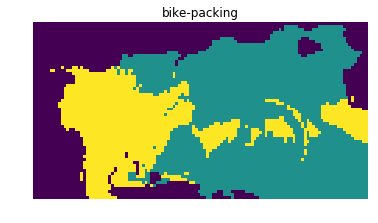

I0329 15:00:21.734781 140736097145664 session.py:147] The model took 3.073 seconds to make a prediction
I0329 15:00:22.059735 140736097145664 logging.py:26] Loaded annotations for sequence bike-packing
I0329 15:00:22.060485 140736097145664 logging.py:26] at path: /Users/alberto/Workspace/CVL/datasets/davis-2017/data/DAVIS/Annotations/480p/bike-packing
I0329 15:00:22.061429 140736097145664 logging.py:26] Annotations shape: (69, 480, 910)
I0329 15:00:23.219702 140736097145664 logging.py:26] For sequence bike-packing the worst frames is #9 with Jaccard: 0.042
I0329 15:00:24.133308 140736097145664 logging.py:26] Creating scribbles from error mask at object_id=0
I0329 15:00:24.137547 140736097145664 logging.py:26] Erosion and dilation with kernel radius: 16.0
I0329 15:00:24.608567 140736097145664 logging.py:26] Time to compute the skeleton mask: 473.777 ms
I0329 15:00:24.632132 140736097145664 logging.py:26] Time to transform the skeleton mask into a graph: 23.573 ms
I0329 15:00:24.682385 1

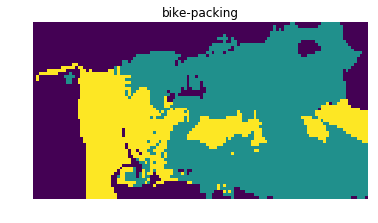

I0329 15:00:28.857048 140736097145664 session.py:147] The model took 3.009 seconds to make a prediction
I0329 15:00:29.205552 140736097145664 logging.py:26] Loaded annotations for sequence bike-packing
I0329 15:00:29.206234 140736097145664 logging.py:26] at path: /Users/alberto/Workspace/CVL/datasets/davis-2017/data/DAVIS/Annotations/480p/bike-packing
I0329 15:00:29.206717 140736097145664 logging.py:26] Annotations shape: (69, 480, 910)
I0329 15:00:30.289154 140736097145664 logging.py:26] For sequence bike-packing the worst frames is #0 with Jaccard: 0.017
I0329 15:00:31.217323 140736097145664 logging.py:26] Creating scribbles from error mask at object_id=0
I0329 15:00:31.221073 140736097145664 logging.py:26] Erosion and dilation with kernel radius: 16.0
I0329 15:00:31.710490 140736097145664 logging.py:26] Time to compute the skeleton mask: 492.374 ms
I0329 15:00:31.748511 140736097145664 logging.py:26] Time to transform the skeleton mask into a graph: 38.035 ms
I0329 15:00:31.837874 1

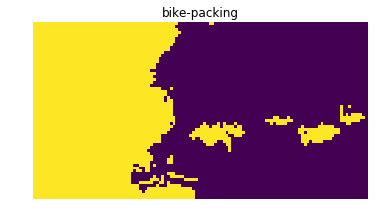

I0329 15:00:36.557003 140736097145664 session.py:147] The model took 3.387 seconds to make a prediction
I0329 15:00:36.889781 140736097145664 logging.py:26] Loaded annotations for sequence bike-packing
I0329 15:00:36.890502 140736097145664 logging.py:26] at path: /Users/alberto/Workspace/CVL/datasets/davis-2017/data/DAVIS/Annotations/480p/bike-packing
I0329 15:00:36.891686 140736097145664 logging.py:26] Annotations shape: (69, 480, 910)
I0329 15:00:37.976500 140736097145664 logging.py:26] For sequence bike-packing the worst frames is #16 with Jaccard: 0.036
I0329 15:00:38.920994 140736097145664 logging.py:26] Creating scribbles from error mask at object_id=0
I0329 15:00:38.924961 140736097145664 logging.py:26] Erosion and dilation with kernel radius: 16.0
I0329 15:00:39.486880 140736097145664 logging.py:26] Time to compute the skeleton mask: 565.063 ms
I0329 15:00:39.578288 140736097145664 logging.py:26] Time to transform the skeleton mask into a graph: 91.419 ms
I0329 15:00:39.968366 

In [ ]:
from davisinteractive import logging
from davisinteractive.client import DavisInteractiveSession
from davisinteractive.dataset import Davis
from davisinteractive.utils.scribbles import scribbles2mask, scribbles2points
from davisinteractive.models.pixelwise_metric_learning import PixelWiseMetricLearningModel

import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

logging.set_info_level(2)

davis_root = '/Users/alberto/Workspace/CVL/datasets/davis-2017/data/DAVIS/'
davis = Davis(davis_root)

model = PixelWiseMetricLearningModel('../../pixelwise-metric-learning-demo/pixelnn/assets/data/dataset.hdf5')
MAX_N = 1000

with DavisInteractiveSession(host='localhost', davis_root=davis_root, 
                             subset='val', max_time=None, max_nb_interactions=3) as sess:
    count = 15
    while sess.is_running() and count:
        sequence, scribbles, new_sequence = sess.get_scribbles(only_last=False)
        annotated_frame = scribbles['annotated_frame']
  
        if new_sequence:
#             print(f'Loading sequence: {sequence}')
            model.load_sequence(sequence)
            
        X, Y = scribbles2points(scribbles, model.IMG_SIZE)
        
        # Downsample points
        n = len(X)
        if n > MAX_N: 
            idx = np.random.choice(n, size=MAX_N, replace=False)
            X = X[idx]
            Y = Y[idx]

        pred_masks_ds = model(X, Y)
        
        seq_info = davis.dataset['sequences'][sequence]
        img_size = tuple(seq_info['image_size'][::-1])
        
        f, _, _ = pred_masks_ds.shape
        pred_masks = np.empty((f,) + img_size, dtype=np.int)
        for i in range(f):
            m = pred_masks_ds[i]
            m = cv2.resize(m, img_size[::-1], interpolation=cv2.INTER_NEAREST)
            pred_masks[i] = m
            
        plt.imshow(pred_masks[annotated_frame])
        plt.title(sequence)
        plt.axis('off')
        plt.show()
        
        
        sess.submit_masks(pred_masks)
        count -= 1
#         break

    df = sess.get_report()

In [3]:
df

,sequence,scribble_idx,interaction,object_id,frame,jaccard,timming
0,bike-packing,1,1,0,0,0.029245,2.049083
1,bike-packing,1,1,1,0,0.093101,2.049083
2,bike-packing,1,1,0,1,0.021818,2.049083
3,bike-packing,1,1,1,1,0.096743,2.049083
4,bike-packing,1,1,0,2,0.020358,2.049083
5,bike-packing,1,1,1,2,0.097563,2.049083
6,bike-packing,1,1,0,3,0.022683,2.049083
7,bike-packing,1,1,1,3,0.086380,2.049083
8,bike-packing,1,1,0,4,0.025328,2.049083
9,bike-packing,1,1,1,4,0.079129,2.049083


In [4]:
df.groupby(['sequence', 'scribble_idx', 'interaction', 'object_id']).mean()

jaccard   timming
sequence     scribble_idx interaction object_id                    
bike-packing 1            1           0          0.085944  2.049083
                                      1          0.065683  2.049083
                          2           0          0.086118  3.269892
                                      1          0.059473  3.269892
                          3           0          0.076553  3.219586
                                      1          0.074192  3.219586
             2            1           0          0.102488  3.452329
                                      1          0.038769  3.452329
                          2           0          0.157938  3.266579
                                      1          0.076249  3.266579
                          3           0          0.167705  3.212040
                                      1          0.092967  3.212040
             3            1           0          0.127624  3.823447
                                      1          0.020816  3.823447
                          2           0          0.177829  3.357805
                                      1          0.055010  3.357805
                          3           0          0.128338  3.189860
                                      1          0.031298  3.189860
blackswan    1            1           0          0.098726  0.651727
                          2           0          0.013603  2.405838
                          3           0          0.056941  2.197229
             2            1           0          0.098726  0.762340
                          2           0          0.078848  2.254725
                          3           0          0.025177  2.404905